In [1]:
# from tkinter import *
# from PIL import ImageTk, Image

# xpoint = []
# ypoint = []
# if __name__ == "__main__":
#     root = Tk()

#     #setting up a tkinter canvas with scrollbars
#     frame = Frame(root, bd=2, relief=SUNKEN)
#     frame.grid_rowconfigure(0, weight=1)
#     frame.grid_columnconfigure(0, weight=1)
#     xscroll = Scrollbar(frame, orient=HORIZONTAL)
#     xscroll.grid(row=1, column=0, sticky=E+W)
#     yscroll = Scrollbar(frame)
#     yscroll.grid(row=0, column=1, sticky=N+S)
#     canvas = Canvas(frame, bd=0, xscrollcommand=xscroll.set, yscrollcommand=yscroll.set)
#     canvas.grid(row=0, column=0, sticky=N+S+E+W)
#     xscroll.config(command=canvas.xview)
#     yscroll.config(command=canvas.yview)
#     frame.pack(fill=BOTH,expand=1)

#     #adding the image
#     File = "images/images/4.jpg"
# #     File = askopenfilename(parent=root, initialdir="C:/",title='Choose an image.')
#     img = ImageTk.PhotoImage(Image.open(File))
#     canvas.create_image(0,0,image=img,anchor="nw")
#     canvas.config(scrollregion=canvas.bbox(ALL))

#     #function to be called when mouse is clicked
#     def printcoords(event):
#         global xpoint
#         global ypoint
#         #outputting x and y coords to console
#         print (event.x,event.y)
#         xpoint.append(event.x)
#         ypoint.append(event.y)
#     #mouseclick event
#     canvas.bind("<Button 1>",printcoords)

#     root.mainloop()


In [2]:
import cv2 
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

img1 = cv2.imread('images/images/1.jpg') 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = np.array(img1)

img2 = cv2.imread('images/images/2.jpg') 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = np.array(img2)

img3 = cv2.imread('images/images/3.jpg') 
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3 = np.array(img3)

img4 = cv2.imread('images/images/4.jpg') 
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img4 = np.array(img4)

riv = shuffle(pd.read_csv('images/images/ariver.csv'))[:50][:]
ri = []
for index, row in riv.iterrows():
    ri.append([ img1[int(row['x'])][int(row['y'])], img2[int(row['x'])][int(row['y'])],
                 img3[int(row['x'])][int(row['y'])], img4[int(row['x'])][int(row['y'])] ])
ri = np.array(ri)

nriv = shuffle(pd.read_csv('images/images/anon_river.csv'))[:100][:]
nri = []
for index, row in nriv.iterrows():
    nri.append([ img1[int(row['x'])][int(row['y'])], img2[int(row['x'])][int(row['y'])],
                 img3[int(row['x'])][int(row['y'])], img4[int(row['x'])][int(row['y'])] ])
nri = np.array(nri)


mr = (ri.sum(axis=0)/ri.shape[0])
mnr = (nri.sum(axis=0)/nri.shape[0])
covar_r = (((ri - mr).T).dot(ri - mr))/ri.shape[0]
covar_nr = (((nri - mnr).T).dot(nri - mnr))/nri.shape[0]

# print(ri.sum(axis=0))
# print(ri.shape[0])
# print(nri.sum(axis=0))
# print(mr)
# print(mnr)
# print(covar_r)
# print(covar_nr)


[2181 1456 1523 1217]
50
[4000 2509 2604 3340]
[43.62 29.12 30.46 24.34]
[40.   25.09 26.04 33.4 ]
[[ 2.9156  2.6656  2.9148 -2.6908]
 [ 2.6656  3.5056  3.1448 -5.7208]
 [ 2.9148  3.1448  4.1684 -4.2164]
 [-2.6908 -5.7208 -4.2164 24.7844]]
[[ 7.28    6.41    9.42    5.32  ]
 [ 6.41    7.0019  9.4364  7.674 ]
 [ 9.42    9.4364 15.8984  8.534 ]
 [ 5.32    7.674   8.534  34.08  ]]


(4, 512, 512)
13785 248359


<function matplotlib.pyplot.show(*args, **kw)>

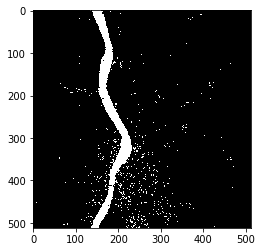

In [3]:
test = np.array([img1,img2,img3,img4])
print(test.shape)
out = np.zeros([512,512])
out.shape
icovar_r = np.linalg.inv(covar_r)
icovar_nr = np.linalg.inv(covar_nr)
sqrt_det_covar_r = np.sqrt( np.linalg.det(covar_r))
sqrt_det_covar_nr = np.sqrt(np.linalg.det(covar_nr))
P1 = 0.3
P2 = 0.7
t55 = 0
z = 0
for i in range(512):
    for j in range(512):
        x = [test[0][i][j], test[1][i][j], test[2][i][j], test[3][i][j]]
        rclass =   ((x-mr).T).dot(icovar_r).dot(x - mr)
        nrclass =   ((x-mnr).T).dot(icovar_nr).dot(x - mnr)
        p1 = -0.5 * P1 *  (1/sqrt_det_covar_r) * np.exp(rclass)
        p2 = -0.5 * P2 *  (1/sqrt_det_covar_nr) * np.exp(nrclass)
        if p1  >=  p2 :
            t55+=1
            out[i][j] = 255
        else :
            z+=1
print(t55,z)
plt.imshow(out, cmap='gray')
plt.show

(4, 512, 512)
11909 250235


<function matplotlib.pyplot.show(*args, **kw)>

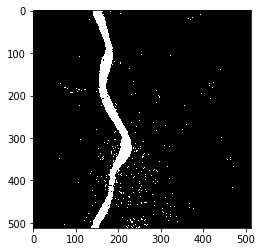

In [4]:
test = np.array([img1,img2,img3,img4])
print(test.shape)
out = np.zeros([512,512])
out.shape
icovar_r = np.linalg.inv(covar_r)
icovar_nr = np.linalg.inv(covar_nr)
sqrt_det_covar_r = np.sqrt( np.linalg.det(covar_r))
sqrt_det_covar_nr = np.sqrt(np.linalg.det(covar_nr))
P1 = 0.5
P2 = 0.5
t55 = 0
z = 0
for i in range(512):
    for j in range(512):
        x = [test[0][i][j], test[1][i][j], test[2][i][j], test[3][i][j]]
        rclass =   ((x-mr).T).dot(icovar_r).dot(x - mr)
        nrclass =   ((x-mnr).T).dot(icovar_nr).dot(x - mnr)
        p1 = -0.5 * P1 *  (1/sqrt_det_covar_r) * np.exp(rclass)
        p2 = -0.5 * P2 *  (1/sqrt_det_covar_nr) * np.exp(nrclass)
        if p1  >=  p2 :
            t55+=1
            out[i][j] = 255
        else :
            z+=1
print(t55,z)
plt.imshow(out, cmap='gray')
plt.show

(4, 512, 512)
10940 251204


<function matplotlib.pyplot.show(*args, **kw)>

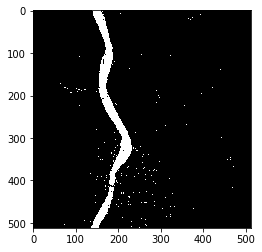

In [5]:
test = np.array([img1,img2,img3,img4])
print(test.shape)
out = np.zeros([512,512])
out.shape
icovar_r = np.linalg.inv(covar_r)
icovar_nr = np.linalg.inv(covar_nr)
sqrt_det_covar_r = np.sqrt( np.linalg.det(covar_r))
sqrt_det_covar_nr = np.sqrt(np.linalg.det(covar_nr))
P1 = 0.7
P2 = 0.3
t55 = 0
z = 0
for i in range(512):
    for j in range(512):
        x = [test[0][i][j], test[1][i][j], test[2][i][j], test[3][i][j]]
        rclass =   ((x-mr).T).dot(icovar_r).dot(x - mr)
        nrclass =   ((x-mnr).T).dot(icovar_nr).dot(x - mnr)
        p1 = -0.5 * P1 *  (1/sqrt_det_covar_r) * np.exp(rclass)
        p2 = -0.5 * P2 *  (1/sqrt_det_covar_nr) * np.exp(nrclass)
        if p1  >=  p2 :
            t55+=1
            out[i][j] = 255
        else :
            z+=1
print(t55,z)
plt.imshow(out, cmap='gray')
plt.show